# Computational drug discovery: part 5
## QSAR Model Building of genital herpes Inhibitors

In [1]:
# Import libraries
import pandas as pd


In [2]:
# Load the data
! wget -O genital_herpes_06_bioactivity_data_3class_pIC50_pubchem_fp.csv https://raw.githubusercontent.com/AnVales/Drug-discovery/main/genital_herpes_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2021-09-13 11:43:26--  https://raw.githubusercontent.com/AnVales/Drug-discovery/main/genital_herpes_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 429392 (419K) [text/plain]
Saving to: ‘genital_herpes_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’

genital_herpes_06_b 100%[===================>] 419.33K  --.-KB/s    in 0.004s  

2021-09-13 11:43:26 (99.9 MB/s) - ‘genital_herpes_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’ saved [429392/429392]



In [3]:
# Read data
bioactivity_data = pd.read_csv('genital_herpes_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [7]:
bioactivity_data

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000
1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.167491
2,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.000000
3,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.187087
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.568636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.823909
231,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.619789
232,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.958607
233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.214670


In [8]:
# Let's have the two sets
X = bioactivity_data.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
231,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
232,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
Y = bioactivity_data.pIC50
Y

0      4.000000
1      4.167491
2      4.000000
3      5.187087
4      4.568636
         ...   
230    5.823909
231    5.619789
232    4.958607
233    7.214670
234    4.481486
Name: pIC50, Length: 235, dtype: float64

In [14]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]
    # It is important to maintain the original indices

In [15]:
# remove_low_variance function
X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP15,PubchemFP16,PubchemFP20,PubchemFP33,PubchemFP37,PubchemFP115,PubchemFP116,PubchemFP129,PubchemFP131,PubchemFP132,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP150,PubchemFP152,PubchemFP153,PubchemFP157,PubchemFP159,PubchemFP160,PubchemFP180,PubchemFP181,PubchemFP185,PubchemFP186,PubchemFP192,PubchemFP193,PubchemFP199,PubchemFP256,PubchemFP257,PubchemFP258,PubchemFP259,PubchemFP261,PubchemFP293,PubchemFP294,PubchemFP299,PubchemFP301,PubchemFP305,PubchemFP308,...,PubchemFP647,PubchemFP650,PubchemFP651,PubchemFP652,PubchemFP654,PubchemFP655,PubchemFP656,PubchemFP657,PubchemFP658,PubchemFP665,PubchemFP666,PubchemFP671,PubchemFP672,PubchemFP673,PubchemFP674,PubchemFP680,PubchemFP684,PubchemFP685,PubchemFP689,PubchemFP692,PubchemFP695,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP704,PubchemFP712,PubchemFP713,PubchemFP716,PubchemFP734,PubchemFP737,PubchemFP755,PubchemFP757,PubchemFP758,PubchemFP776,PubchemFP779,PubchemFP797,PubchemFP800,PubchemFP818,PubchemFP820,PubchemFP821
0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,...,1,1,1,0,1,1,0,0,0,0,1,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,0,0,0,...,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
232,1,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,0,0,0,...,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0
233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
# Save the descriptors
X.to_csv('descriptor_list.csv', index = False)

In [19]:
# In the app, use the following to get this same descriptor list
# of 212 variables from the initial set of 881 variables
Xlist = list(pd.read_csv('descriptor_list.csv').columns)
X[Xlist]

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP15,PubchemFP16,PubchemFP20,PubchemFP33,PubchemFP37,PubchemFP115,PubchemFP116,PubchemFP129,PubchemFP131,PubchemFP132,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP150,PubchemFP152,PubchemFP153,PubchemFP157,PubchemFP159,PubchemFP160,PubchemFP180,PubchemFP181,PubchemFP185,PubchemFP186,PubchemFP192,PubchemFP193,PubchemFP199,PubchemFP256,PubchemFP257,PubchemFP258,PubchemFP259,PubchemFP261,PubchemFP293,PubchemFP294,PubchemFP299,PubchemFP301,PubchemFP305,PubchemFP308,...,PubchemFP647,PubchemFP650,PubchemFP651,PubchemFP652,PubchemFP654,PubchemFP655,PubchemFP656,PubchemFP657,PubchemFP658,PubchemFP665,PubchemFP666,PubchemFP671,PubchemFP672,PubchemFP673,PubchemFP674,PubchemFP680,PubchemFP684,PubchemFP685,PubchemFP689,PubchemFP692,PubchemFP695,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP704,PubchemFP712,PubchemFP713,PubchemFP716,PubchemFP734,PubchemFP737,PubchemFP755,PubchemFP757,PubchemFP758,PubchemFP776,PubchemFP779,PubchemFP797,PubchemFP800,PubchemFP818,PubchemFP820,PubchemFP821
0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,...,1,1,1,0,1,1,0,0,0,0,1,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,0,0,0,...,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
232,1,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,0,0,0,...,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0
233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# Random Forest Regression Model: although it is not the best model, it might work
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Build the model with 500 estimators
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8863438030624464

In [21]:
# Model Prediction
Y_pred = model.predict(X)
Y_pred

array([4.04326441, 4.23280149, 4.51713372, 4.51713372, 4.2961788 ,
       4.16360512, 4.2961788 , 4.27007417, 4.54815337, 4.06577688,
       4.14117777, 4.17050455, 4.06577688, 4.14117777, 4.08092923,
       4.34353272, 4.2961788 , 4.23739464, 4.2961788 , 4.6397182 ,
       4.55926951, 5.02219049, 4.92376835, 3.58358325, 3.42790724,
       3.71238472, 3.56732727, 3.88853018, 4.06629974, 4.55926951,
       4.6397182 , 3.97107324, 3.51624144, 3.97107324, 3.97107324,
       4.6397182 , 5.0069148 , 4.55926951, 3.50513881, 5.52597197,
       4.55926951, 4.60389778, 4.69268587, 4.75115287, 4.87069613,
       6.65922399, 4.86153311, 5.4036591 , 6.94196009, 6.80038503,
       6.78022761, 6.74768134, 6.4780791 , 6.01653322, 6.52710689,
       6.28666333, 5.4036591 , 6.94234638, 6.74768134, 6.30239266,
       6.30239266, 5.34940295, 4.35350201, 3.97107324, 3.52040359,
       3.97107324, 3.90529011, 5.77826049, 4.68959675, 4.6397182 ,
       3.97107324, 5.12588303, 5.63544659, 4.4132012 , 3.97107

In [22]:
# Model Performance
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.25
Coefficient of determination (R^2): 0.89


In [23]:
# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

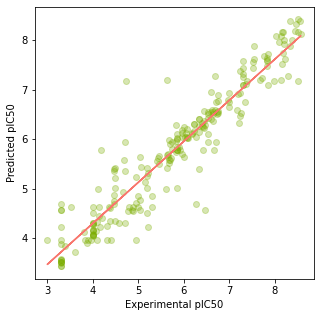

In [24]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

In [28]:
# Save Model as Pickle Object: Pickling is a way to convert a python object (list, dict, etc.) into a character stream. 
# The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
import pickle

In [29]:
pickle.dump(model, open('genital_herpes_model.pkl', 'wb'))